In [1]:
from dypac import Dypac
from dypac.bascpp import stab_maps
import numpy as np
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from dypac_utils import load_dypac, load_r2_intra, load_r2_inter, load_r2_other, mean_r2, mean_inter_r2
from sklearn.preprocessing import StandardScaler

In [5]:
R = np.load('/data/cisl/pbellec/cneuromod_embeddings/xp_202012/friends-s01_reproducibility/Rmatch_fwhm-5_cluster-50_state-150.npy')

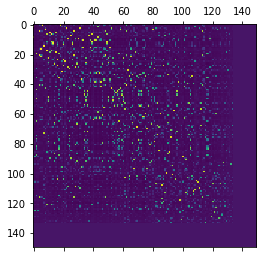

In [6]:
plt.matshow(R[:, :, 0, 0])

0.8777443494586036

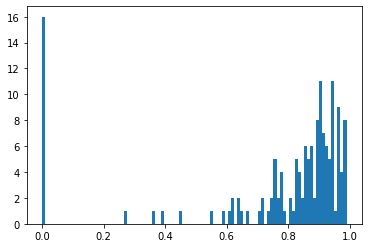

In [7]:
match_val = np.max(R[:,:, 0, 0], axis=1)
plt.hist(match_val, bins=100)
np.median(match_val)

# Load test-retest parcels for one subject

In [2]:
subject = 'sub-03'
fwhm = '5'
cluster = 300
state = 900
root_data = '/data/cisl/pbellec/cneuromod_embeddings/xp_202012/'
model, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, 
    state=state, batch='even')

In [ ]:
model2, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, 
    state=state, batch='odd')

# Build common mask

In [ ]:
from nilearn.image import math_img
mask_img = math_img("img1 + img2 > 0", img1=model.masker_.mask_img, img2=model2.masker_.mask_img)

# Resample and normalize parcels in a common space

In [ ]:
scaler = StandardScaler()
x = model.components_.todense()
img_parcels = model.masker_.inverse_transform(x)
masker = NiftiMasker(standardize=False, detrend=False, mask_img=mask_img)
xn = scaler.fit_transform(masker.fit_transform(img_parcels).transpose())

In [ ]:
scaler2 = StandardScaler()
y = model2.components_.todense()
img_parcels2 = model2.masker_.inverse_transform(y)
yn = scaler2.fit_transform(masker.fit_transform(img_parcels2).transpose())

# Match parcels

In [ ]:
R = np.matmul(xn.transpose(), yn) / yn.shape[0]

In [ ]:
R.shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.matshow(R)

In [ ]:
match_val = np.max(R, axis=1)
plt.hist(match_val, bins=100)

In [ ]:
np.median(match_val)

In [ ]:
match_pair = np.argmax(R, axis=1)

In [ ]:
match_pair

In [ ]:
order = np.argsort(-match_val)

In [ ]:
start = 0
n_comp = 10
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp*3))
for num in range(n_comp):
    map1 = model.masker_.inverse_transform(model.components_[order[num + start], :].todense())
    map2 = model2.masker_.inverse_transform(model2.components_[match_pair[order[num + start]], :].todense())
    plotting.plot_stat_map(map1, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*num + 1), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)
    plotting.plot_stat_map(map2, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*(num + 1)), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)

In [ ]:
start = 10
n_comp = 10
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp*3))
for num in range(n_comp):
    map1 = model.masker_.inverse_transform(model.components_[order[num + start], :].todense())
    map2 = model2.masker_.inverse_transform(model2.components_[match_pair[order[num + start]], :].todense())
    plotting.plot_stat_map(map1, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*num + 1), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)
    plotting.plot_stat_map(map2, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*(num + 1)), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)

In [ ]:
start = 20
n_comp = 10
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp*3))
for num in range(n_comp):
    map1 = model.masker_.inverse_transform(model.components_[order[num + start], :].todense())
    map2 = model2.masker_.inverse_transform(model2.components_[match_pair[order[num + start]], :].todense())
    plotting.plot_stat_map(map1, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*num + 1), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)
    plotting.plot_stat_map(map2, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*(num + 1)), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)

In [ ]:
start = 30
n_comp = 10
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp*3))
for num in range(n_comp):
    map1 = model.masker_.inverse_transform(model.components_[order[num + start], :].todense())
    map2 = model2.masker_.inverse_transform(model2.components_[match_pair[order[num + start]], :].todense())
    plotting.plot_stat_map(map1, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*num + 1), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)
    plotting.plot_stat_map(map2, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*(num + 1)), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)

In [ ]:
start = 40
n_comp = 10
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp*3))
for num in range(n_comp):
    map1 = model.masker_.inverse_transform(model.components_[order[num + start], :].todense())
    map2 = model2.masker_.inverse_transform(model2.components_[match_pair[order[num + start]], :].todense())
    plotting.plot_stat_map(map1, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*num + 1), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)
    plotting.plot_stat_map(map2, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*(num + 1)), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)

In [ ]:
start = 400
n_comp = 10
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp*3))
for num in range(n_comp):
    map1 = model.masker_.inverse_transform(model.components_[order[num + start], :].todense())
    map2 = model2.masker_.inverse_transform(model2.components_[match_pair[order[num + start]], :].todense())
    plotting.plot_stat_map(map1, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*num + 1), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)
    plotting.plot_stat_map(map2, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*(num + 1)), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)

In [ ]:
start = 600
n_comp = 10
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp*3))
for num in range(n_comp):
    map1 = model.masker_.inverse_transform(model.components_[order[num + start], :].todense())
    map2 = model2.masker_.inverse_transform(model2.components_[match_pair[order[num + start]], :].todense())
    plotting.plot_stat_map(map1, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*num + 1), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)
    plotting.plot_stat_map(map2, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*(num + 1)), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)

In [ ]:
start = 700
n_comp = 10
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp*3))
for num in range(n_comp):
    map1 = model.masker_.inverse_transform(model.components_[order[num + start], :].todense())
    map2 = model2.masker_.inverse_transform(model2.components_[match_pair[order[num + start]], :].todense())
    plotting.plot_stat_map(map1, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*num + 1), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)
    plotting.plot_stat_map(map2, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*(num + 1)), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)

In [ ]:
start = 800
n_comp = 10
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp*3))
for num in range(n_comp):
    map1 = model.masker_.inverse_transform(model.components_[order[num + start], :].todense())
    map2 = model2.masker_.inverse_transform(model2.components_[match_pair[order[num + start]], :].todense())
    plotting.plot_stat_map(map1, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*num + 1), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)
    plotting.plot_stat_map(map2, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*(num + 1)), 
                           threshold=0.1, vmax=1, colorbar=False, draw_cross=False)

In [ ]:
start = 890
n_comp = 10
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp*3))
for num in range(n_comp):
    map1 = model.masker_.inverse_transform(model.components_[order[num + start], :].todense())
    map2 = model2.masker_.inverse_transform(model2.components_[match_pair[order[num + start]], :].todense())
    plotting.plot_stat_map(map1, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*num + 1), 
                           threshold=0, vmax=1, colorbar=False, draw_cross=False)
    plotting.plot_stat_map(map2, display_mode='ortho', axes=plt.subplot(n_comp, 2, 2*(num + 1)), 
                           threshold=0, vmax=1, colorbar=False, draw_cross=False)